# 人工知能とソフトコンピューティング 第3回 課題

In [1]:
from pathlib import Path # ファイルパスの取り扱い
import pandas as pd # データの取り扱い（CSVからの読み込みに利用）
from pandas import Series, DataFrame
import numpy as np # 数値計算
import matplotlib.pyplot as plt # グラフ描画
import matplotlib.cm # 描画色の管理・生成
from sklearn import metrics # クラスタリングの良さの評価値
from sklearn.cluster import KMeans # k平均法
from sklearn.neighbors import KNeighborsClassifier # k近傍法
from sklearn.pipeline import Pipeline # パイプラインオブジェクト
from sklearn.pipeline import make_pipeline # 簡易パイプライン作成
from sklearn.preprocessing import StandardScaler # データの正規化
from sklearn.model_selection import train_test_split # 訓練データとテストデータの分割
import os # Windows環境の設定
os.environ["OMP_NUM_THREADS"] = "1" # Windows環境の設定

In [9]:
data_sec1 = pd.read_csv(Path("03_data", "train4.csv"))
data_sec1 # 読み込んだデータの確認
# print(data_sec1.min())
# print(data_sec1.max())

,x,y
0,29.0,27.0
1,35.0,42.0
2,35.6,35.0
3,30.0,31.0
4,10.0,11.0
...,...,...
245,38.0,39.0
246,48.0,47.0
247,40.0,46.0
248,48.0,32.0


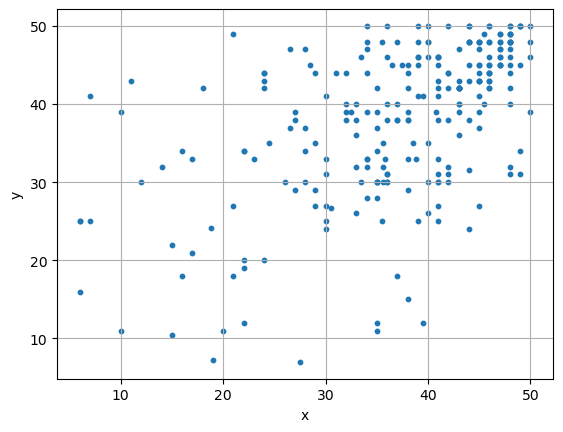

In [3]:
fig = plt.figure()
subplot = fig.add_subplot()
subplot.set_xlabel("x")
subplot.set_ylabel("y")
subplot.scatter(data_sec1["x"], data_sec1["y"], marker = "o", s = 10)
subplot.grid()
plt.show()

In [10]:
def show_clustering_result(subplot, scaler, kmean, data, result, n_clusters, show_centroids = True):
    for i in range(n_clusters):
        Ith = data[result == i]
        subplot.scatter(Ith["x"], Ith["y"], color = plt.cm.tab20(i), s = 10, marker = "o", label = "cluster {}".format(i))
    if show_centroids == True:
        centroids = scaler.inverse_transform(kmean.cluster_centers_)
        subplot.scatter(centroids[:,0], centroids[:,1], s=100, marker = "*", color = "white", linewidth = 1, edgecolor = "black", label="centroids")
#    subplot.legend() # 散布図に凡例を示したい場合，コメントアウトを解除
    subplot.grid()

## 課題1　
### クラスタ数3で分割した場合，それぞれのクラスタの意味はどのように解釈できるか

In [11]:
n = 3 # クラスタ数
n_init = 10 # 代表点の取り直し回数（ランダムな代表点設定の繰り返しで最も評価の高いものを採用する）

# ランダムな代表点を初期設定するクラスタリングのモデルを定義
scaler = StandardScaler() # 標準偏差と平均を用いてデータを標準化するためのスケーラ
kmeans = KMeans(init = "random", n_clusters = n, n_init = n_init) # 最初の代表点をランダムに取るアルゴリズム
#kmean = KMeans(init = "k-means++", n_clusters = n, n_init = n_init) # 最初の代表点をk-means++で(できるだけばらけるように)取るアルゴリズム
model = Pipeline([
    ("scaler", scaler),
    ("kmeans", kmeans)
])
# 学習させる = クラスタリングを行う
result_sec1 = model.fit_predict(data_sec1)
# このセルを実行すると UserWarning が出ることがあるが無視して良い

c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


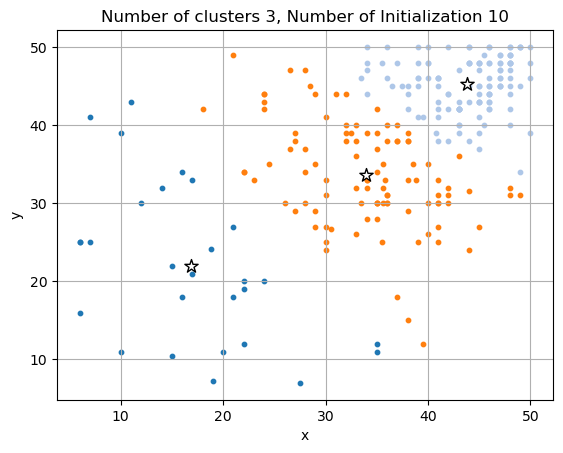

In [12]:
fig = plt.figure()
subplot = fig.add_subplot()
subplot.set_title("Number of clusters {}, Number of Initialization {}".format(n, n_init))
subplot.set_xlabel("x")
subplot.set_ylabel("y")
show_clustering_result(subplot, scaler, kmeans, data_sec1, result_sec1, n)
plt.show()

クラスタが３つに分割された際の各クラスタの意味は以下のような解釈が可能である。上図の左下から右上にかけて、クラスタ０、クラスタ１、クラスタ２と考える。
- クラスタ０：全体的または相対的な数値が低いグループ。例えば、xを数学の点数、yを物理の点数とした場合、両方の点数が低い学生および、片方の点数が非常に低い学生が含まれている。
- クラスタ１：中程度の数値または、片方が高くもう片方が中程度のグループ。例えば、xが数学の点数、yが物理の点数とした場合、両方の点数が中程度の学生、または数学が高く物理が中程度の学生及びその逆が含まれている。
- クラスタ２：全体的な数値が高いグループ。例えば、xを数学の点数、yを物理の点数とした場合、両方の点数が総合敵に高い学生が含まれている。

## 課題２　クラスタリング結果の評価とクラスタ数の検討
### このデータにとって適切なクラスタ数とそのように判断した理由

In [13]:
print("二乗歪み= ", kmeans.inertia_)

二乗歪み=  164.45835275286674


In [14]:
n_clusters = 20 # 20クラスタまで計算する（変更可）

distortions = [] # 二乗歪みのリスト（空）
for i in range(1, n_clusters + 1):
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 10) # 最初の代表点を k-means++ アルゴリズムで決定する
    #kmeans = KMeans(init = "random", n_clusters = i, n_init = 10) # 最初の代表点をランダムに決定する
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("kmeans", kmeans)
    ])
    model.fit_predict(data_sec1)
    distortions.append(kmeans.inertia_) # 計算した二乗歪みを追加
# このセルを実行すると UserWarning が出ることがあるが無視して良い

c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\sit

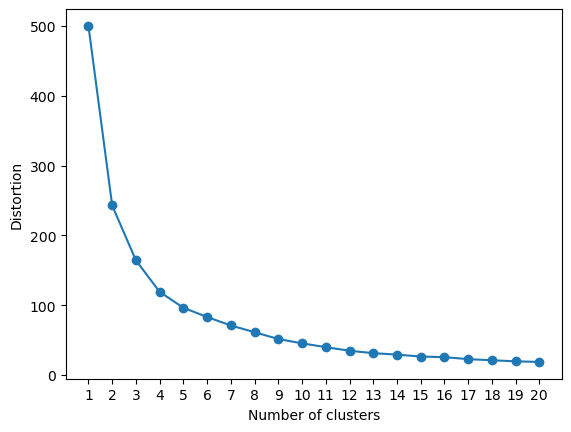

In [15]:
fig = plt.figure()
subplot = fig.add_subplot()
subplot.plot(range(1, n_clusters + 1), distortions, marker = "o")

subplot.set_xlabel("Number of clusters")
subplot.set_ylabel("Distortion")
plt.xticks(range(1, n_clusters + 1))
plt.show()

まず上の20までのクラスタ数の二条歪みをプロットしたグラフを確認すると、クラスタ数が４から５にかけて二条歪みが著しく減少していることがわかる。
したがって、このデータにとって適切なクラスタ数は4または5以降ｄと判断できる。
ここで、4以降の減少率を以下で比較する。

クラスタ数 1: 二乗歪み 499.99999999999994
クラスタ数 2: 二乗歪み 242.90191743473423
    減少率: 51.42%
クラスタ数 3: 二乗歪み 164.32939168498314
    減少率: 32.35%
クラスタ数 4: 二乗歪み 119.15636850515573
    減少率: 27.49%
クラスタ数 5: 二乗歪み 96.40615930500947
    減少率: 19.09%
クラスタ数 6: 二乗歪み 83.15628057155129
    減少率: 13.74%
クラスタ数 7: 二乗歪み 71.03963394794613
    減少率: 14.57%
クラスタ数 8: 二乗歪み 61.42443952445711
    減少率: 13.53%
クラスタ数 9: 二乗歪み 51.66764034338614
    減少率: 15.88%
クラスタ数 10: 二乗歪み 45.43895482681356
    減少率: 12.06%
クラスタ数 11: 二乗歪み 40.01433342477437
    減少率: 11.94%
クラスタ数 12: 二乗歪み 34.86013531787463
    減少率: 12.88%
クラスタ数 13: 二乗歪み 31.398732935755707
    減少率: 9.93%
クラスタ数 14: 二乗歪み 29.299202125749627
    減少率: 6.69%
クラスタ数 15: 二乗歪み 26.554956216981797
    減少率: 9.37%
クラスタ数 16: 二乗歪み 25.683978306456492
    減少率: 3.28%
クラスタ数 17: 二乗歪み 22.823631216222957
    減少率: 11.14%
クラスタ数 18: 二乗歪み 21.239204138977847
    減少率: 6.94%
クラスタ数 19: 二乗歪み 19.675214906487106
    減少率: 7.36%
クラスタ数 20: 二乗歪み 18.85006855691204
    減少率: 4.19%


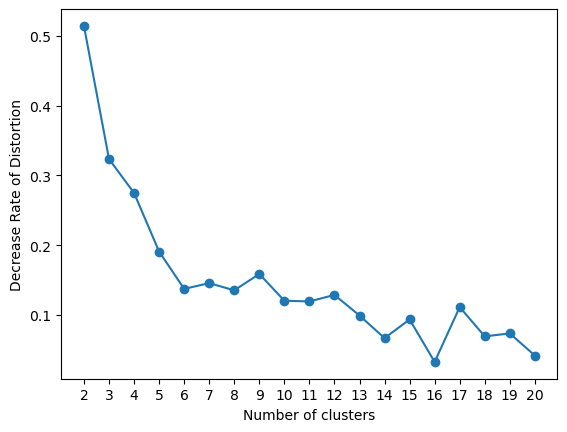

In [ ]:
decRate = []

for i, data in enumerate(distortions):
    print("クラスタ数 {}: 二乗歪み {}".format(i + 1, data))
    if i > 0:
        rate = (distortions[i - 1] - data) / distortions[i - 1]
        decRate.append(rate)
        print("    減少率: {:.2%}".format(rate))

fig = plt.figure()
subplot = fig.add_subplot()
subplot.set_xlabel("Number of clusters")
subplot.set_ylabel("Decrease Rate of Distortion")
subplot.plot(range(2, n_clusters + 1), decRate, marker = "o")
plt.xticks(range(2, n_clusters + 1))
plt.show()

減少率のグラフより、6以降からは減少率が上昇や減少を繰り返しており、一意な減少傾向は見られない。
したがって、このデータにとって適切なクラスタ数は6であると予想しそのクラスタを可視化することとする。

c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


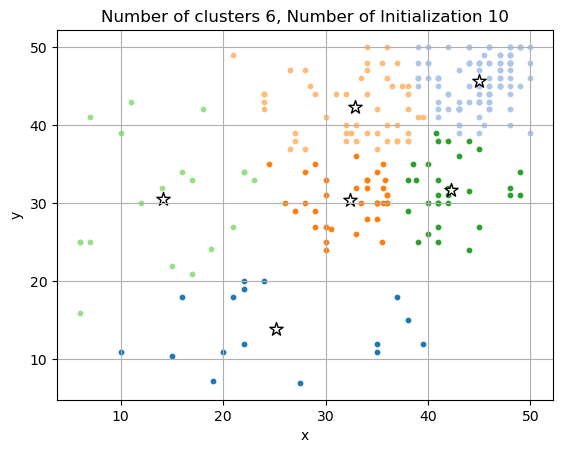

In [43]:
n = 6 # クラスタ数
n_init = 10 # 代表点の取り直し回数（ランダムな代表点設定の繰り返しで最も評価の高いものを採用する）
scaler = StandardScaler() # 標準偏差と平均を用いてデータを標準化するためのスケーラ
kmeans = KMeans(init = "random", n_clusters = n, n_init = n_init) # 最初の代表点をランダムに取るアルゴリズム
model = Pipeline([
    ("scaler", scaler),
    ("kmeans", kmeans)
])
result_sec1 = model.fit_predict(data_sec1)

fig = plt.figure()
subplot = fig.add_subplot()
subplot.set_title("Number of clusters {}, Number of Initialization {}".format(n, n_init))
subplot.set_xlabel("x")
subplot.set_ylabel("y")
show_clustering_result(subplot, scaler, kmeans, data_sec1, result_sec1, n)
plt.show()

6クラスタに分割すると、xおよびyの値がともに低いグループが十分に分割されていないことが見て取れる。
したがって、このデータにとって適切なクラスタ数は7と仮定し、そのクラスタを可視化することとする。

c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


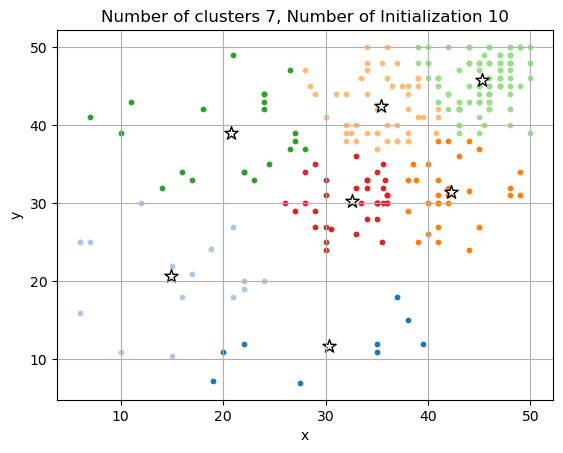

In [42]:
n = 7 # クラスタ数
n_init = 10 # 代表点の取り直し回数（ランダムな代表点設定の繰り返しで最も評価の高いものを採用する）
scaler = StandardScaler() # 標準偏差と平均を用いてデータを標準化するためのスケーラ
kmeans = KMeans(init = "random", n_clusters = n, n_init = n_init) # 最初の代表点をランダムに取るアルゴリズム
model = Pipeline([
    ("scaler", scaler),
    ("kmeans", kmeans)
])
result_sec1 = model.fit_predict(data_sec1)

fig = plt.figure()
subplot = fig.add_subplot()
subplot.set_title("Number of clusters {}, Number of Initialization {}".format(n, n_init))
subplot.set_xlabel("x")
subplot.set_ylabel("y")
show_clustering_result(subplot, scaler, kmeans, data_sec1, result_sec1, n)
plt.show()

上がが7クラスタに分割した際の可視化結果である。ここでは先に上げた問題が十分に解決されていることがわかる。また各クラスタも意味のある分類がされていると考えられることから、このデータにとって適切なクラスタ数は7であると結論付ける。